## Fitting Kepler's Law

If Kepler had access to even basic computation it wouldn't have taken him so long to figure out his laws. Let's use Python to fit Kepler's law to the data.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# let's make a data structure to hold the data for the planets
# We will use a dictionary to hold the data for each planet
# The keys will be the planet names
# The values will be a list of the period and distance from the sun
planet_data = {
    # planet: [period, distance]
    'mercury': [1/4, 0.4],
    'venus': [.6, 0.7],
    'earth': [1, 1],
    'mars': [2, 1.5],
    'jupiter': [12, 5.2],
    'saturn': [30, 9.5],
    'uranus': [84, 19.2],
    'neptune': [165, 30.1]
}

# We can get the keys using the keys() method
planet_names = planet_data.keys()
print(planet_names)

# We can get the values using the values() method
planet_values = planet_data.values()
print(planet_values)

dict_keys(['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune'])
dict_values([[0.25, 0.4], [0.6, 0.7], [1, 1], [2, 1.5], [12, 5.2], [30, 9.5], [84, 19.2], [165, 30.1]])


When using dictionaries, the way we get values out is to use keys. For example, if we have a dictionary called `planet` and we want to get the value for the key `mass` we would write `planet['mass']`. The values of each key can be any type of data, including other dictionaries.

```python
planet = {'mass': 1.0, 'radius': 1.0, 'period': {'in_years':1, 'in_days':365}}
planet['mass']
# 1.0
```

In [11]:
# We want to get the period and distance for each planet

# start with empy lists to hold the periods and distances
periods = []
distances = []

# We can loop over the planet names
for planet in planet_names:
    # We can use the index to get the period and distance
    # for each planet
    period, distance = planet_data[planet]
    periods.append(period)
    distances.append(distance)
    
print('Names:', planet_names)
print('Periods:', periods)
print('Distances:', distances)

Names: dict_keys(['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune'])
Periods: [0.25, 0.6, 1, 2, 12, 30, 84, 165]
Distances: [0.4, 0.7, 1, 1.5, 5.2, 9.5, 19.2, 30.1]


## Plotting

The first step to figuring out what the relationship between period and distance is, is to plot our data. This is a good first step in any form of data analysis. Let's use the `matplotlib` library to make a plot.

We want to predict the Period from the Distance. So let's plot the Period on the y-axis and the Distance on the x-axis.

Text(0.5, 0, 'Distance (AU)')

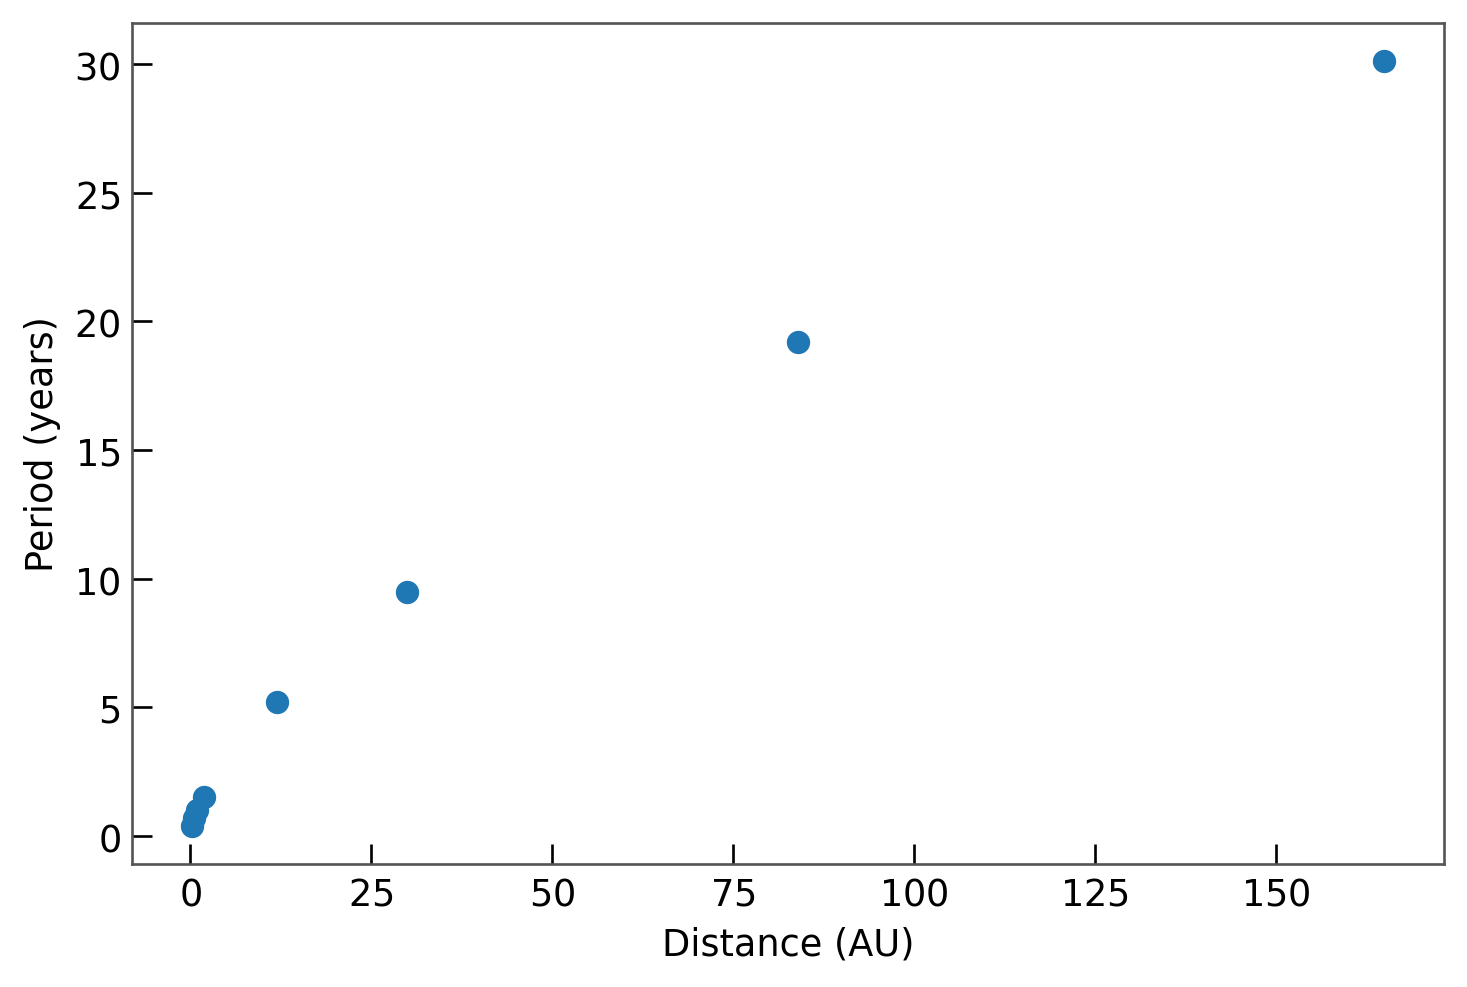

In [40]:
# let's make a quick plot of the data

plt.plot(periods, distances, 'o')
plt.ylabel('Period (years)')
plt.xlabel('Distance (AU)')

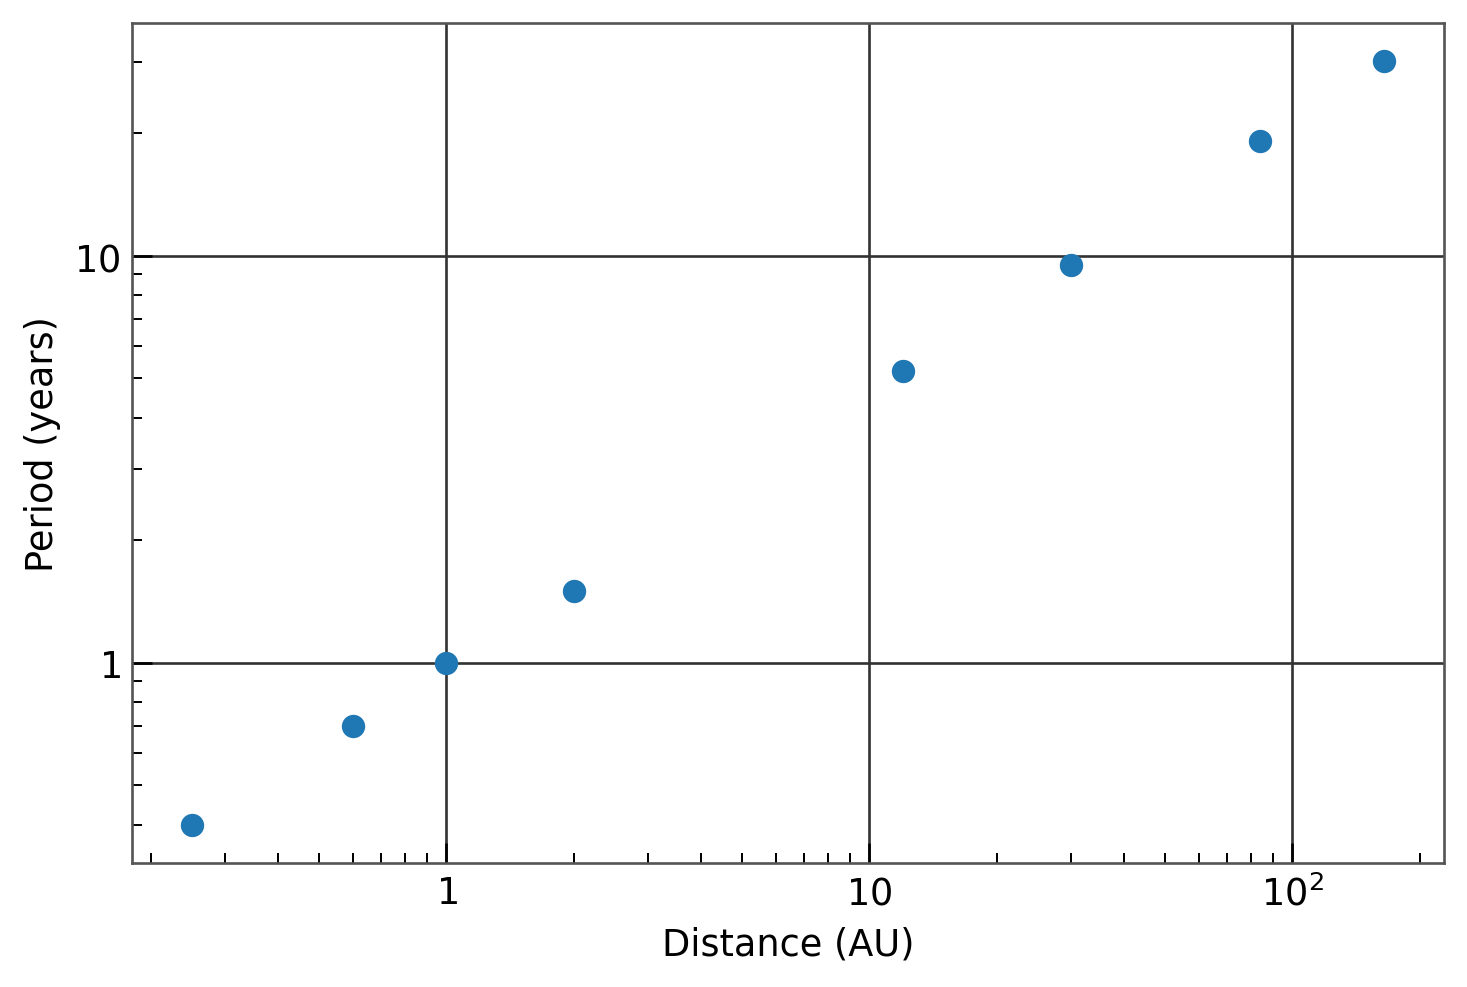

In [15]:
# let's look at the data on a log scale to get a better look
# a straight line in log-log space means we have an exponential relationship
plt.plot(periods, distances, 'o')
plt.ylabel('Period (years)')
plt.xlabel('Distance (AU)')
plt.loglog()
plt.grid(True)

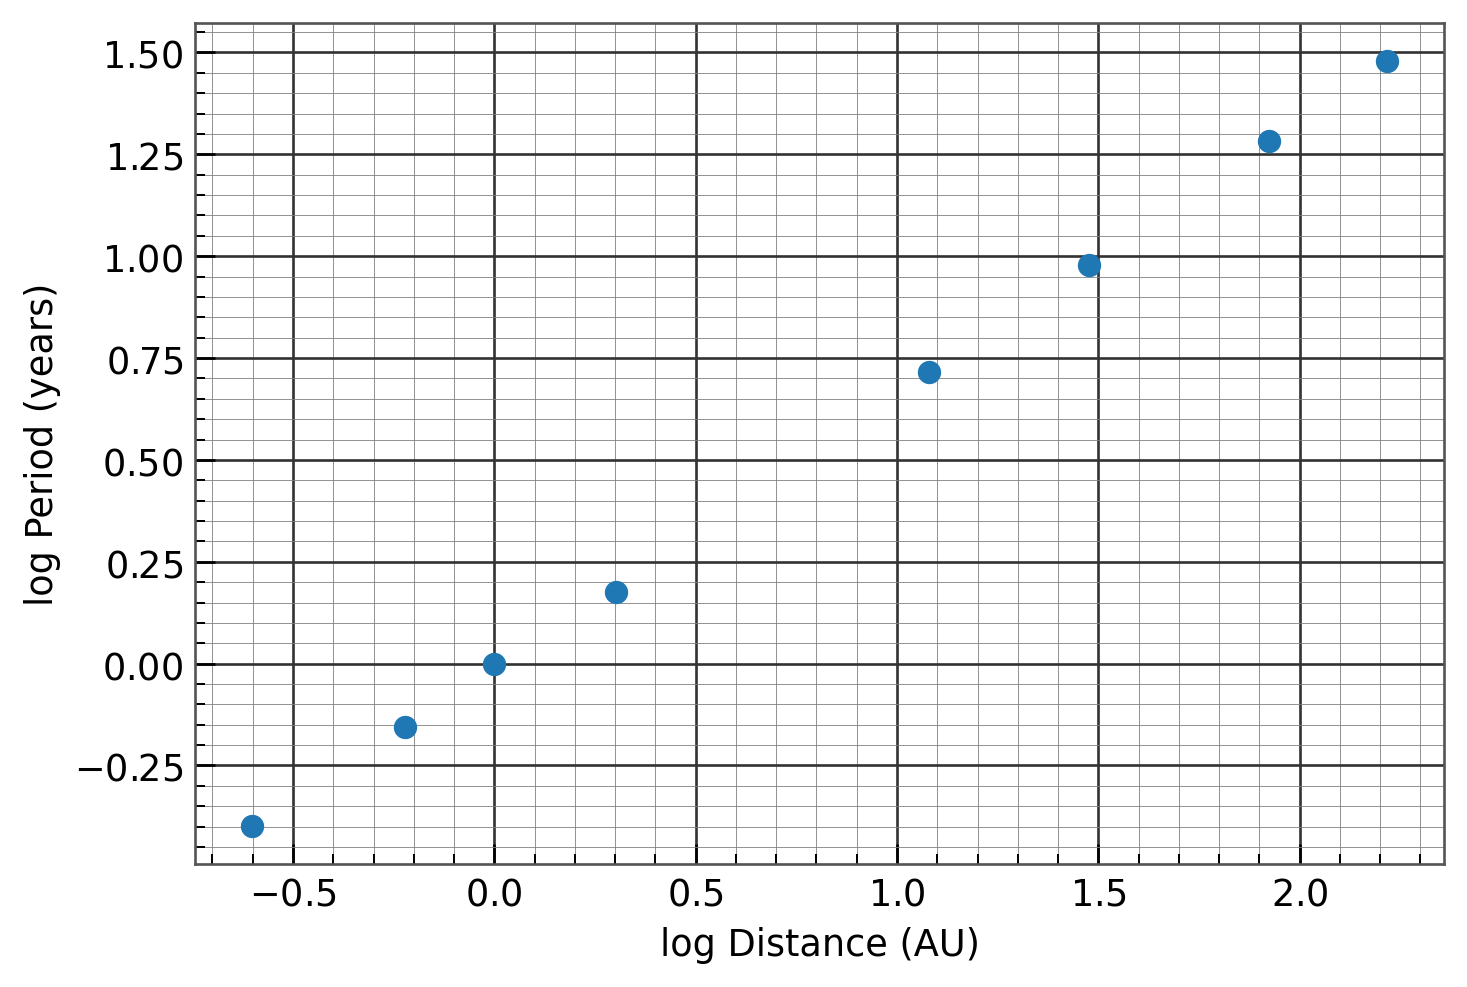

In [18]:
plt.plot(np.log10(periods), np.log10(distances), 'o')
plt.ylabel('log Period (years)')
plt.xlabel('log Distance (AU)')
plt.grid(True)
# add minor ticks
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=.25, color='gray')

A straight line in log-log space has the form is

log(distance) = slope * log(period)
$$ \log(a) = m \log(P) $$

Converting to linear space we have

$$ a = P^m $$

where $m$ is the slope of the line. 

## Fitting the data


So this data simple enough that we can kinda guesstimate the slope. However, we can use `scipy.optimize.curve_fit` to fit a function to data. `curve_fit` tries to find values for the parameters of a function that "best fit" the data.

We want to use a function that looks like this:
```python
def kepler(P, m):
    return P**m
```



In [20]:
# Let's define our model function
def kepler(P, m):
    return P ** m

In [22]:
val, error_sqrd = curve_fit(kepler, distances, periods)
print(val)

[1.49984255]


In [23]:
# So our best fit is

print('Best fit is P^{:.1f} = d'.format(val[0]))

Best fit is P^1.5 = d


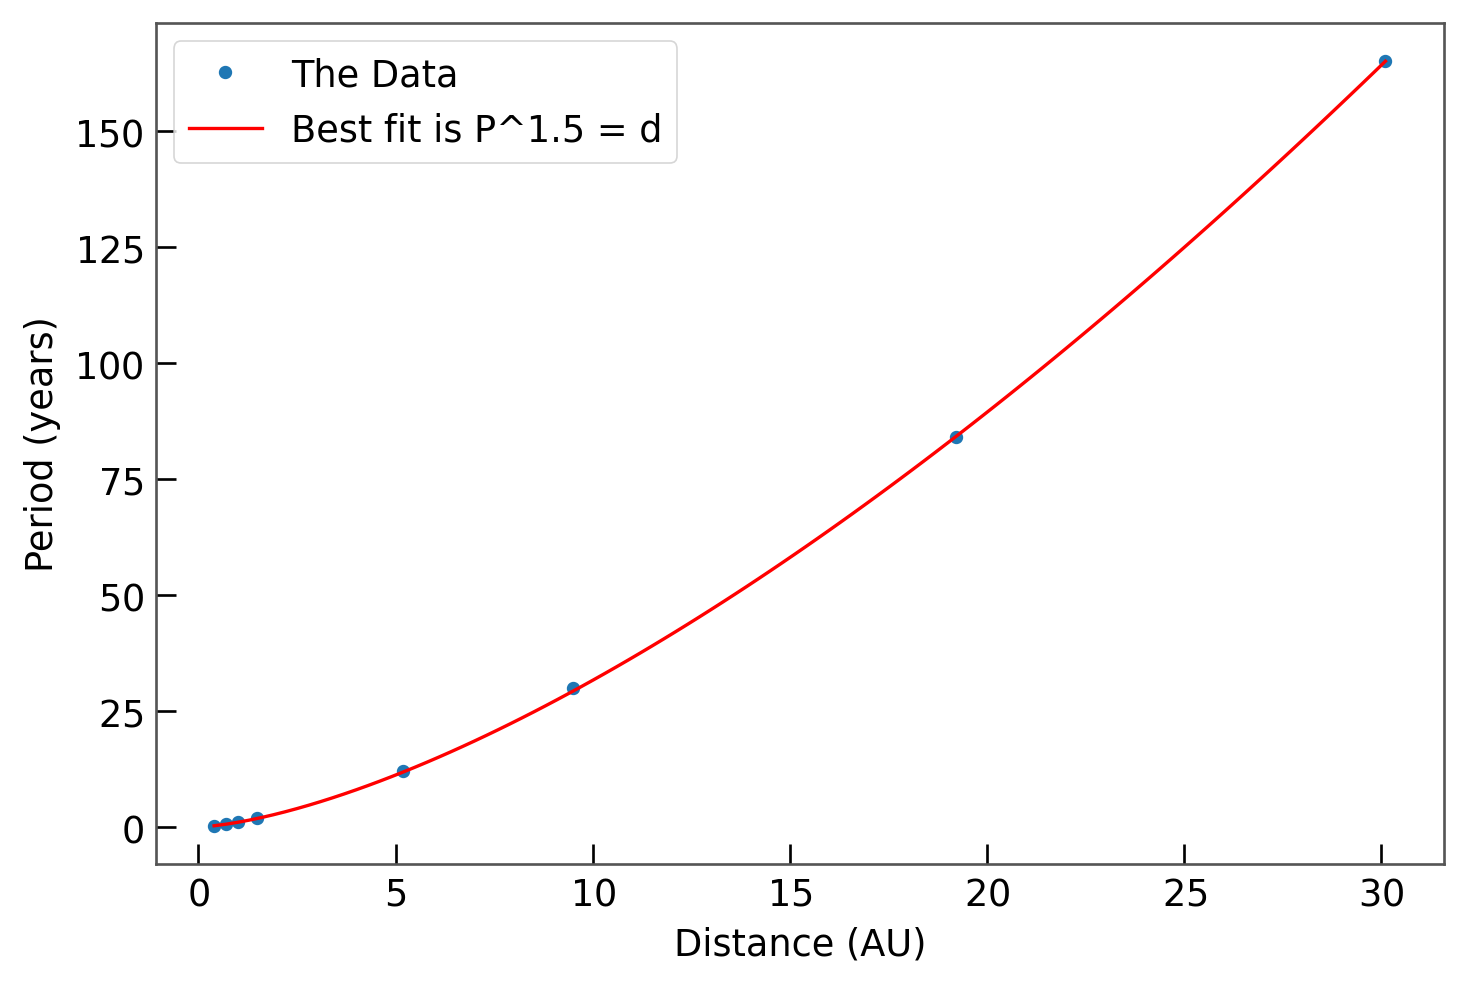

In [35]:
# Let's plot that over our data

plt.plot(distances, periods, marker = '.', linestyle = 'none', label = 'The Data')
plt.ylabel('Period (years)')
plt.xlabel('Distance (AU)')
# plt.loglog()
# plt.grid(True)

# Let's plot that over our data
d = np.linspace(min(distances), max(distances), 100)
plt.plot(d, kepler(d, val[0]), 'r', linewidth = 1, label = 'Best fit is P^{:.1f} = d'.format(val[0]))

plt.legend()